# 1. Load the data :



In [46]:
#Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [47]:
Hdf=pd.read_excel('housing.xlsx')

In [48]:
Hdf.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

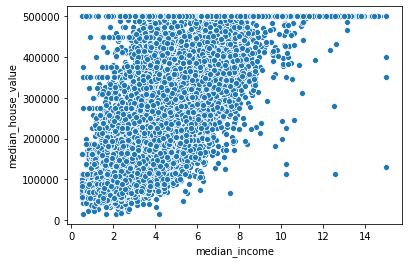

In [49]:
sns.scatterplot(Hdf['median_income'],Hdf['median_house_value'])

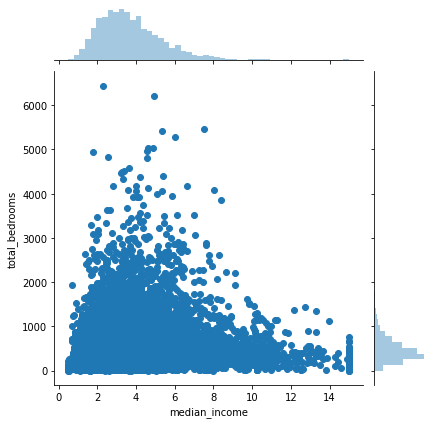

In [50]:
sns.jointplot(Hdf['median_income'],Hdf['total_bedrooms'])

In [51]:
#sns.pairplot(Hdf)

In [52]:
#Checking the missing values in dataframe
Hdf.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [53]:
Hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [54]:
Hdf.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# 2. Handle missing values :



In [55]:
#Checking whether the fillna worked or not
Hdf.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
Hdf['total_bedrooms']=imputer_mean.fit_transform(Hdf[['total_bedrooms']])

In [57]:
#Features are all columns except median_house_value which is label
features = Hdf.iloc[:,:-1]
label = Hdf.iloc[:,[-1]]


# 3. Encode categorical data :

In [58]:
#Categorical column(Ocean_proximity) is converted in to numerical columns for applying algos of Machine learning
featuresnp =np.array(features)
from sklearn.preprocessing import OneHotEncoder
Ohe = OneHotEncoder(sparse=False)
fOcean = Ohe.fit_transform(featuresnp[:,-1].reshape(-1,1))
fOcean

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [59]:
#Concatenating the onehot encoded columns to the remaining feature columns
Finalarray=np.concatenate((fOcean,featuresnp[:,:-1]),axis=1)
FColumns=features.columns
Columns=np.concatenate((features.ocean_proximity.unique(),FColumns[:-1]),axis=0)


In [60]:
#Feature dataframe
Finalfeatures = pd.DataFrame(Finalarray,columns=Columns)


# 5. Standardize data :

<AxesSubplot:xlabel='median_income'>

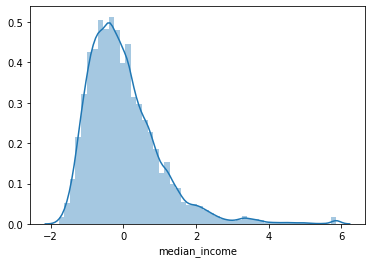

In [61]:
#Standardization of features and label
from sklearn import preprocessing
names = Finalfeatures.columns
scaler = preprocessing.StandardScaler()
scaledFeature_df = scaler.fit_transform(Finalfeatures)

scaledFeature_df = pd.DataFrame(scaledFeature_df, columns=names)
sns.distplot(scaledFeature_df['median_income'])


<AxesSubplot:>

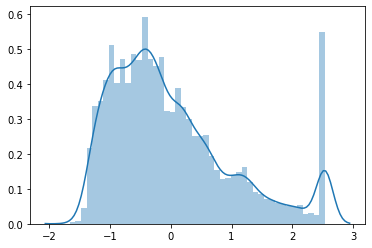

In [62]:
scaledLabeldf=scaler.fit_transform(label)
sns.distplot(scaledLabeldf)


<AxesSubplot:>

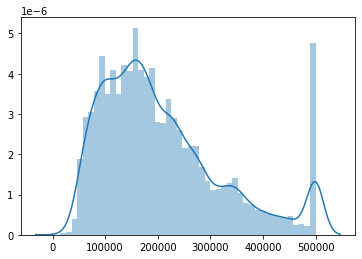

In [63]:
sns.distplot(label)

# 4. Split the dataset : 

In [64]:
#Train Test Split in to 80% and 20%
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
modelLR=LinearRegression()
for i in range(1,500):
    X_train,X_test,y_train,y_test=train_test_split(scaledFeature_df,scaledLabeldf,test_size=0.2,random_state=i)
    modelLR.fit(X_train,y_train)
    train_score=modelLR.score(X_train,y_train)
    test_score=modelLR.score(X_test,y_test)
    if((test_score>train_score) &(test_score >=0.6)):
        print('Test score is {}, train score is {} for random state {}'.format(test_score,train_score,i))

Test score is 0.6532007045047906, train score is 0.6434940538946107 for random state 3
Test score is 0.6508164905923572, train score is 0.6439684507507182 for random state 5
Test score is 0.6547357362885622, train score is 0.6430129784682888 for random state 8
Test score is 0.646434812579746, train score is 0.645024282998325 for random state 10
Test score is 0.6480259181456305, train score is 0.6445855901029893 for random state 11
Test score is 0.6471519703919855, train score is 0.6449354808325316 for random state 13
Test score is 0.6513239456309972, train score is 0.6439501181153641 for random state 22
Test score is 0.6585791220860107, train score is 0.641974605484084 for random state 23
Test score is 0.6576543514929207, train score is 0.6423435401351221 for random state 24
Test score is 0.6475700154021536, train score is 0.6448261995301947 for random state 25
Test score is 0.651714420462065, train score is 0.6438236383811008 for random state 26
Test score is 0.6485251422023381, train

# 6. Perform Linear Regression : 

In [89]:
# Randomstate 489 has maximum test score 
X_train,X_test,y_train,y_test=train_test_split(scaledFeature_df,scaledLabeldf,test_size=0.2,random_state=489)
modelLR.fit(X_train,y_train)
train_score=modelLR.score(X_train,y_train)
test_score=modelLR.score(X_test,y_test)


In [90]:
print('Test score is {}, train score is {} '.format(test_score,train_score))

Test score is 0.6719459411980258, train score is 0.6379829274780104 


In [95]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, modelLR.predict(X_test)))

print(rmse)

0.594422008227273


# 7. Bonus exercise: Perform Linear Regression with one independent variable :

In [69]:
#Extracting only median_income feature
featureIncome = Hdf.iloc[:,[-3]]
names = featureIncome.columns
scaledFeatureIncome_df = scaler.fit_transform(featureIncome)
scaledFeatureIncome_df = pd.DataFrame(scaledFeatureIncome_df, columns=names)


In [70]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(scaledFeatureIncome_df,scaledLabeldf,test_size=0.2,random_state=489)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

In [72]:
train_score

0.4671285002147647

In [73]:
test_score

0.49567133695391097

In [74]:
y_pred=model.predict(X_test)

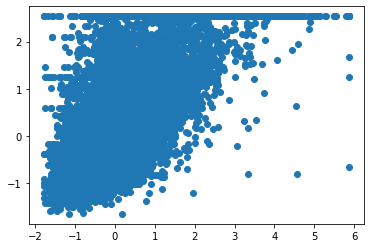

In [75]:
#scatter plot of known trained feature data and label data
plt.scatter(X_train,y_train)

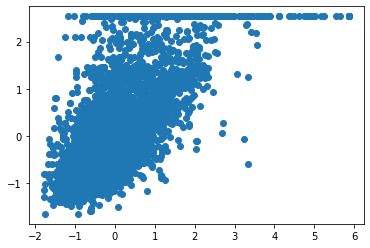

In [76]:
#scatter plot of known test feature data and label data
plt.scatter(X_test,y_test)

In [77]:
#Plotting the predicted label for unknown test data
plt.scatter(X_test,y_pred)


# 8. Deployment

In [78]:
import pickle
pickle.dump(model , open('HousepricePredictor.model' , 'wb'))

In [79]:
HousePricePredictor = pickle.load(open('HousepricePredictor.model', 'rb'))

In [80]:
Income =int(input('enter your income'))


enter your income 52


In [81]:
Incomenp=np.array([[Income]])

In [82]:
HousePrice=HousePricePredictor.predict(Incomenp)

In [83]:
print('The house price is {} for income of {}'.format(HousePrice[0][0],Income))

The house price is 35.428846347908454 for income of 52
